# Neural Network Representation

In the first two sections of the course we focused on the important Machine Learning foundations of Linear Regression and Logistic Regression. Both are very important data analysis techniques that have been used extensively in both statistics and machine learning for decades. They are powerful, they are (relatively) easy to understand, and they can be used with a surprisingly large number of problem types. But they aren't the end of the story for us, they are just the beginning. This week we will look at how the idea of linear and logistic functions form the building blocks of Deep Neural Networks. 

## Preliminaries 
We begin by reintroducing some functions from our Logistic Regression and Linear Regression notes. 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def standardize(x):
    col_means = np.mean(x,axis=0)
    col_std = np.std(x,axis=0)
    return (x - col_means) / col_std , col_means, col_std

def h_linear(theta,X):
    z = np.matmul(theta,X)
    return z

def h_logistic(theta,X):
    z = np.matmul(theta,X)
    return 1 / (1 + np.exp(-z))

def cost_logistic(theta,xi,yi):
    # note - this function calculate the cost for all variations of theta. A vector is returned. 
    z = np.matmul(theta,xi)
    h = 1 / (1 + np.exp(-z))
    if yi == 1:
        return -np.log(h)
    elif yi == 0:
        return -np.log(1-h)
    else: raise ValueError('yi was neither 0 nor 1: ' + str(yi))
        
def cost_linear(theta,xi,yi):
    # note - this function calculate the cost for all variations of theta. A vector is returned. 
    z = np.matmul(theta,xi)
    h = 1 / (1 + np.exp(-z))
    rv = ((h - yi)**2) / 2
    return rv  

def J(theta,x,y,f): 
    s = 0
    m = len(x)
    for i in range(0,m):
        v = f(theta,x[i],y[i])
        s+= v
    return s / m

def gd(theta_in,min_delta_in,a_in,X_in,Y_in,h,maxiterations=-1,cost=cost_logistic):
    m = len(Y_in) # number of training examples
    _ , n = np.shape(X_in) # number of features
    
    # define a list used to store the costs - these do not have to be calculated but are useful for debugging
    c = []
    
    # Create a theta variable which we will use to keep track of the current value of theta
    theta = theta_in
    
    # Create a list which we will use for storing theta results during optimization
    thetas = np.array(theta_in,ndmin=2)

    # Create a counter which is used for limiting the number of iterations used if maxiterations has been defined
    k = 0
    
    # Begin main search loop
    while maxiterations is -1 or k < maxiterations:
        k+=1
        c.append(J(theta_in,X_in,Y_in,cost))
        
        temp = np.copy(theta)
        for j in range(0,n):
            # making calculations for jth parameter 
            s = 0 
            for i in range(0,m):
                s+=  (h(temp.T,np.ravel(X_in[i,:])) - Y_in[i])  * X_in[i,j]
            theta[j] = temp[j] - a_in * (1/m) * s 
        thetas = np.vstack((thetas,theta))
        
        progressing = False
        for j in range(0,n):
            if(abs(temp[j] - theta[j]) > min_delta_in):
                progressing = progressing | True
        if not progressing: break 
    return thetas, c

## Motivation: From Linear to Non-Linear Model Learning
Both Logistic Regression and Linear Regression are essentially linear models. That is, the hypotheses that they create are based on linear combinations of inputs. When we know that the structure we are looking for in data is more complicated than a linear model we can cheat in Linear and Logistic Regression by introducing extra non-linear features which can be fed into the linear classifier. This is exactly what we did when we introduced higher order features in our datasets in examples for Linear Regression and Logistic Regression. 

The problem with this approach is that it does not scale. In order to achieve complex non-linear decision boundaries in a classification problem we might have to add many additional features. If we are introducing quadratic or other higher order polynomial variants this can lead to an exponential number of features. 

Neural Networks allow us to build non-linear models without having to manual encode all of these additional higher order features from our base features. The network itself looks at building these higher-order features as part of its own training process. The advantage of this method is that we don't have to guess what higher order features are useful - the neural network will only create higher order features that are shown to have a beneficial effect. 

The disadvantage to this neural network approach is computational cost. Neural Networks are orders of magnitude more expensive to train than a logistic regression classifier - even if that classifier has had many extra manually created features added through data expansion. From the mid 1990s to the early 2010s this high computational cost meant that neural networks were not practical problem solvers. However, faster CPUs and speed-ups made possible by GPUs have allowed Neural Networks to finally realize their promise. 

## Logistic Units
Neural Networks are architectures of simple processing units called neurons which are inspired by neurons in the brain but which are really just simple computational units which calculate a function of their input. Taken individually these neurons cannot achieve much, but when integrated into a complex architecture and trained with a powerful learning algorithm, they can build complex non-linear models over our data. 

In practice many different types of neurons can be used to implement a neural network. Here we will begin by focusing on one of the most important of the these, the logistic unit or logistic neuron. 

A logistic unit is based on the logistic classifier as reviewed last week. In simple terms, the logistic unit makes a binary classification decision based on the application of the logistic function to the negative scalar product of an input vector times some parameters. This is formalized in our familiar function below: 

\begin{equation}
h_{\theta}(x) = \frac{1}{1 + x^{-\theta x}}
\end{equation}

or

\begin{equation}
h_{\theta}(x) = \frac{1}{1 + e^{-z}}
\end{equation}

where z, the logit, is defined as:

\begin{equation}
z = \theta x 
\end{equation}

In the above, $\theta$ are our model parameters, $x$ is our input data vector, and $h$ is the output of our function which is commonly referred to as the hypothesis. $z$ is the linear product of our parameters and input values, which as we have mentioned is often referred to as the **logit**. 

We interpret the logistic function as follows: 

\begin{equation}
h_{\theta}(x) = P(Y=1 \;|\; x_{i},\theta)
\end{equation}

meaning that we must apply a threshold to $h$ to get our classification decision. 

As mentioned we can have many different types of neurons. The most significant difference between neuron types is the output or **activation function**. In the above the activation function is the logistic function, but a linear activation function can for example be used to produce a continuous real valued output from a neuron. 

For example we can define and apply a simple linear classifier over two input variables. In the example below our target $Y$ indicates whether a part for a truck was found to be faulty following a vehicle inspection. Feature $x1$ indicates the number of years since the part was replaced and $x2$ indicates the distance the truck has traveled since the last inspection in kilometers.  

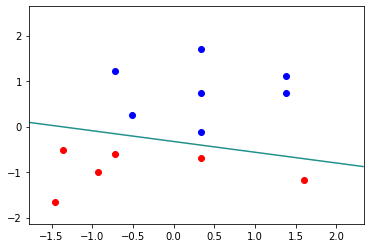

In [2]:
# Define the target values
Y =  [0,0,0,0,0,1,0,1,1,1,1,1,1]

# Define the 2 input features in a instance wise fashion
X = np.array([[0.3,50000],
              [3.2,100000],
              [0.4,170000],
              [0.8,120000],
              [2,150000],
              [1.2,250000],
              [1.0,160000],
              [2,210000],
              [2,300000],
              [2,400000],
              [3,300000],
              [3,340000],
              [1,350000]
             ])

# standardize our input data
X, means, stds = standardize(X)

# Define the function parameters - these were figured out using gradient descent (not shown here)
theta = [3.6,2.6,11]

# initialize values for features x1 and x2
x1_range = np.arange(0,4,0.1) 
x2_range = np.arange(0.0,500000,1000.0) 

x1s, x2s = np.meshgrid(x1_range, x2_range) # remember - plt.surface likes this meshgrid output
mesh_rows, mesh_cols = x1s.shape

# construct 1D arrays for x1, x2 and x0
x1 = np.ravel(x1s)
x2 = np.ravel(x2s)
x = np.vstack((x1,x2)).T

# rescale our data based on our normalization parameters
x =  (x-means)/stds

# define the new matrix X based around our standardized vector for X previously obtained 
x_0 = np.array([1]*len(x2))
x = np.hstack((x_0[:, np.newaxis],x))

# perform calculations
z = h_logistic(theta,x.T)

# reshape result to have the same organization as result of meshgrid
zs = np.reshape(z,(mesh_rows,mesh_cols))
x1s = np.reshape(x[:,1],(mesh_rows,mesh_cols))
x2s = np.reshape(x[:,2],(mesh_rows,mesh_cols))

for l in range(len(Y)):
    if Y[l] == 0:
        plt.plot(X[l,0],X[l,1],'o',c='r')
    elif Y[l] == 1:
        plt.plot(X[l,0],X[l,1],'o',c='b')
    else: print(Y[l])

plt.contour(x1s, x2s, zs, 1)
plt.show()

A logistic neuron is simply a different architectural perspective on the logistic function. Structurally an artificial neuron has the following components:
 * A set of inputs x - these are the values that are fed into the neuron 
 * A set of weights w - each weight $w_{i}$ can be interpreted as the relative strength (positive or negative) that we assign to an individual input value $x_{i}$
 * A cell body which computes the output for this neuron - the cell body can compute different types of outputs. For our purposes here we assume the output is a logistic function over the inputs x and the weights w. 
 * An output which holds the computed logistic function
 
We can illustrate this structure with respect to our faulty truck part classifier with the figure below. 

<!-- neurons.png -->
<img width="300" src="https://drive.google.com/uc?id=1YEoJWzGJdZ8FJUaQHI5pjlzNOtBP_Rmr"/>

As previously described, in logistic regression we appended a vector of 1s to our input data array X in order to facilitate a vectorized implementation of linear functions. The same is accomplished in the architecture of the neuron through the addition of the **bias unit** which:
 1. is always assumed to have a value = 1
 2. Is usually referenced as the $0^{th}$ input unit to the neuron.  

In the example above we draw in the bias unit and weights explicitly, but it is important to note that in drawings we usually omit the bias unit and often the values for weights. Thus the example above would more normally be drawn as shown below. 

<!-- neurons2.png -->
<img width="300" src="https://drive.google.com/uc?id=1YL1Z1RY8zApFvL30Gi2pE0KrCuKiBa8-"/>


## Combining Logistic Units
Logistic units can be combined to implement more complex functions. We can examine this by looking at the design of individual binary operations, and then the combination of these units to achieve more sophisticated operations. 

### AND Units

Consider first the construction of the simple AND operator defined over two variables x1 and x2. The desired logic for an AND operation is defined as follows:

x1 | x2 | x1 AND x2
--- | --- | :---:
0 |	0 |	0
0 |	1 |	0
1 |	0 |	0
1 | 1 | 1

where x1, x2 and are result are all binary values. 

It is relatively easy to find the parameters for a logistic unit which will result in computing an AND function. Such a unit (illustrated fully with bias units and weights) is illustrated below. 

<!-- and.png -->
<img width="300" src="https://drive.google.com/uc?id=1XpDFm3ANBi0G7pC-u2vlf3L9dTrLmtix"/>


Noting that the value for $x0 = 1$ and $x1,x2 \in \{0,1\}$, we see that the parameter on the bias unit pushes the scalar product of inputs and parameters to a minimum value of -30. The only way this scalar sum of inputs and weights can go above 1 is if both the inputs x1 and x2 are 1. This is summarized in the table below:

x1 | x2 | $\theta x$ | g($\theta$ x) 
--- | --- | :---: | :---: 
0 |	0 |	-30 | 0
0 |	1 |	-10 | 0 
1 |	0 |	-10 | 0 
1 | 1 | 10  | 1 

Note that the values of g are actually rounded a little bit. You can see the actual values below and tweak the parameters below. 

In [3]:
def h_log(z):
    return 1 / (1 + np.exp(-z))

def calc(x1,x2,theta0,theta1,theta2):
    x0 = 1
    z = x0*theta0 + x1*theta1 + x2*theta2
    g = h_log(z)
    return z, g

# parameters for AND approximation 
theta0 = -30
theta1 = 20
theta2 = 20

z, g = calc(0,0,theta0,theta1,theta2)
print(str(z) + " " + str(g))

z, g = calc(0,1,theta0,theta1,theta2)
print(str(z) + " " + str(g))

z, g = calc(1,0,theta0,theta1,theta2)
print(str(z) + " " + str(g))

z, g = calc(1,1,theta0,theta1,theta2)
print(str(z) + " " + str(g))

-30 9.357622968839299e-14
-10 4.5397868702434395e-05
-10 4.5397868702434395e-05
10 0.9999546021312976


### OR Units

Similarly the OR operator can be defined over two binary variables $x1$ and $x2$. The logic for the OR operator is summarized below:

x1 | x2 | x1 OR x2
--- | --- | :---:
0 |	0 |	0
0 |	1 |	1
1 |	0 |	1
1 | 1 | 1

By choosing appropriate weights for a logistic unit we can once again achieve the desired logic as illustrated below. 

<!-- or.png --> 
<img width="300" src="https://drive.google.com/uc?id=1YM9MEpa-OVAcNXJrWcW04h87C3FmKKzM"/>

Here the bias unit only partly pushes the scalar product of inputs and parameters below 1. In the case of either or both x1 and x2 being set to 1, the total scalar product will be greater than 0 with the result being that the logistic function has a total output 1. This can be illustrated in the table below. 

x1 | x2 | $\theta x$ | g($\theta$ x)
--- | --- | :---: | :---:
0 |	0 |	-1 | 0
0 |	1 |	1  | 1 
1 |	0 |	1  | 1 
1 | 1 | 3  | 1 

### NOT Units

The final atomic unit we will consider is the NOT unit. The NOT unit takes only one explicit input $x1$ and returns the negation of the value on that input as summarized below:

x1 | NOT x1
--- | :---:
0 |	1 
1 |	0 

A logistic unit which simulates the behaviour of a NOT operation when applied to binary values is illustrated below. 

<!-- not.png --> 
<img width="300" src="https://drive.google.com/uc?id=1YLhgaCDoZaQMOCq6iBbys3N8bJ5W-Lai"/>


Here when x1 is set the 0, the effect of the bias unit with its weight will be to force the scalar product $\theta x$ to be greater than 0. However if $x1=1$ the strong negative value of the weight on $x2$ will lead the scalar product $\theta x$ to be less than 0. This is summarized in the table below. 

x1  | $\theta x$ | g($\theta$ x)
--- | :---:      | :---:
0   |     1      |        1
1   |    -1      |        0 

### XNOR Units

Given the AND, OR, and NOT units defined above we can implement more sophisticated functtions based on those units. To illustrate let us consider the XNOR operation which is defined with the following truth table:

x1 | x2 | x1 XNOR x2
--- | --- | :---:
0 |	0 |	1
0 |	1 |	0
1 |	0 |	0
1 | 1 | 1

XNOR requires both values $x1$ and $x2$ to have the same inputs. The XNOR operation may be defined in terms of our 3 fundamental operations as follows: 

\begin{equation}
x1\; XNOR\; x2 = (x1\; AND\; x2)\; OR\; ((NOT\; x1)\; AND\; (NOT\; x2))
\end{equation}

By allowing the outputs of some units to act as inputs to another units we can implement the above equation with logistic units as follows: 

<!-- xnor.png --> 
<img width="400" src="https://drive.google.com/uc?id=1YWyh4AT8jD2c60mWopZxmMC0PQLqd6xE"/>


The point of all of this is simply this. We can use logistic units to build all types of simple binary functions, and by layering them on top of each other we can build more complex functions. Constructing a XNOR unit is just a basic example. By having more and more layers of units we can build up even more complex functions if we want to -- this can be complex enough to understand words, images and the like. The example above though is handcrafted, so lets move beyond this handcrafted approach. 

## The Architecture of a Neural Network

The network of logistic units used above to define the XNOR operation captures many of the principles of standard neural networks. In this section we discuss the standard basic form of a Neural Network, which is the Feedforward Network. We discuss the Feedforward Network specifically where the network is built exclusively out of logistic units. Networks built out of many other unit types are possible and we will address them later. 

### Layers of the Network 

The Feedforward Neural Network consists of at least three layers of artificial neurons as illustrated below. 

<!-- ffnn.png --> 
<img width="400" src="https://drive.google.com/uc?id=1Y4-m_Cg3zvW777Qw4xFgW0D8gQwf8NHM"/>

In the Feedforward architecture we usually talk about three distinct layer types, i.e., the input layer, the hidden layers, and the output layer. During processing an input layer is clamped to an input data vector, i.e., $x$. The output layer meanwhile captures the result of our complete model, i.e., $Y$. One or more hidden layers can be found between the input and output layers. The hidden layers encode higher order features which operate over the input data which transform the data prior to the final classification at the output layer. 

Each node in layer $j$ is connected to each node in layer $j-1$ through connections which we refer to as weights. The exception to this is layer 0 which is directly clamped to input data as noted above. In practice weights are simply the parameters we assumed in linear and logistic regression. 

### Multi-class Classification

In the example above we have only one neuron in the output layer but there can be many more. For example in the larger network below thee are three output units. 

<!-- ffnn2 --> 
<img width="400" src="https://drive.google.com/uc?id=1Y4ulL3VQ67GUAFK-6t5D5gFbntQRqVUa"/>


This means that we can build 3 binary classifiers in parallel. This gives us our normal way of handling multi-class classification problems. For a target, e.g., animal type, with 3 classes, e.g., dog, cat and hamster, we create a binary output unit for each of those 3 types. In training the network on a multi-class classification problem we expect only one output unit to be active at a time. During classification we ideally want only one output unit to be active, but in practice most will have some activity and we select the output node that has the highest activity as our hypothesised class. This is referred to as the **One versus All** method. 

### Bias Units

Each layer (with the exception of the output layer) also has a bias unit associated with the layer. We include the bias unit in the network below for illustration, and note that bias unit in layer $j$ is not connected to units in unit $j-1$. The is because the value of the bias unit is fixed to 1. 

<!-- ffnn3 --> 
<img width="400" src="https://drive.google.com/uc?id=1YDqvM3v_uzEmqate7FAZu1TOGyWzwsCD"/>

### Deep Networks 

Deep Feedforward Neural Networks are simply defined as Feedforward Netowrks that have more than one hidden layer. For example even this simple model below would be technically referred to as a Deep Network: 

<!-- dnn.png --> 
<img width="400" src="https://drive.google.com/uc?id=1XqmILbylkypZCLuyk46DeVQ97plQZQ_W"/>


Although more typically our networks will in practice have many more nodes at each layer and a number of hidden layers. 


<!-- dnn2.png --> 
<img width="400" src="https://drive.google.com/uc?id=1XtkT1tIkuSrcCaQGrW3yAEpzu0ZiFPQp"/>


## Notational Conventions

When working through descriptions of neural network one of the most challenging problems is keeping track of the notation - particularly with respect to indexing through multiple layers of the network and multiple training and testing examples. 

### Notation for Data
As with any other supervised machine learning method, our model is trained with a set of m input-output tuples:

\begin{equation}
Data_{Training} = \{ (x^{0},y^{0}),(x^{1},y^{1}),(x^{2},y^{2})\dots (x^{m-1},y^{m-1}) \}
\end{equation}

Each tuple is an individual training case which we index with a superscript. 

For each individual training case we assume vectorized inputs and outputs. The length of an input vector must be equal to the number of units on the input layer (not counting the bias unit). Similarly the length of an output vector must be equal to the number of units on the output layer of the network. Thus for a network with 3 input units and 2 output units:

 * $x^{i} \in \{0,1\}^{3\times1}$
 * $y^{i} \in \{0,1\}^{2\times1}$
 
### Notation for Layers
A neural network is built out of a number of layers. A layer typically includes both the nodes and a set of associated weights. In indexing and describing the layers of an individual network we use the following notation:
 * $L$ - the total number of layers in the network
 * $s_{l}$ - the number of nodes the the $l^{th}$ layer of the network - excluding bias units. 

In many sources our first layer is indexed as layer 1 rather than layer 0. However this only makes the programming of these networks more cumbersome. Here we will stick with standard computer science convention of indexing from 0. Hence the input layer is layer 0 and our output layer is layer $L-1$. 

#### Notation for Nodes

Each layer includes a set of activation units. We rarely index the units themselves. Instead we index the values produced at those units. We refer to the output of a node as its activation value. For the first layer the activation value for a given unit is simply the corresponding input value from the data. For all other layers the activation value for a unit is its computed output. For logistic units, this is the logistic function applied to the scalar product of the values of the weights and activations of the $j-1$th layer. 

We denote activation values with the character $a$. A superscript on $a$ is used to index layers. A subscript is used to index the activation values for an individual unit within that layer. To illustrate:
 * $a^{0}$ refers to the vector of activation values for our input layer. This will correspond to our input vector $x$
 * $a^{L-1}$ refers to the vector of activation values for our output layer. This will be our output vector $y$. 
 * $a^{1}$ refers to the vector of activation values on our (first) hidden layer. 
 * $a^{1}_{0}$ refers to the activation value of the bias unit on our (first) hidden layer. This will always be 1. 
 * $a^{1}_{3}$ refers to the activation value of the 3rd (non-bias) unit in the (first) hidden layer as illustrated below. 

<!-- activation.png --> 
<img width="400" src="https://drive.google.com/uc?id=1XmYwPWuLyzNZCyfjbs9ETpdyvTQnj68t"/>


As well as indexing the activation values of the layer, it is often useful to index the partial result $\theta X$. We refer to this value as $z$ and use the same indexing conventions as with the activation values. It is worth noting though that no values for $z$ exist for the input layer as our activation values for that layer come directly from the input vector $x$ rather than through an application of the logistic function. 
 
#### Notation for Weights

For our current purposes the weights associated with layer $j$ are the weights which follow the outputs from the nodes rather than the weights which feed into nodes. Therefore all layers in the network apart from the output layer have a set of weights. (It is worth noting as an aside here that in implementations we often reverse this notation and have weights associated with their target rather than their source layer.)

Weights are denoted with the character $\theta$. A superscript on $\theta$ is used to index layers. A subscript is used to index individual weights within a layer of weights. That subscript is based on a tuple where the first index refers to the source of the weight and the second index refers to the target. 

 * $\theta^{0}$ refers to the weights emerging from the input layer
 * $\theta^{L-2}$ refers to the layer of weights feeding in to the output layer
 * $\theta^{1}$ refers to the weights emerging from the (first) hidden layer
 * $\theta^{1}_{0,1}$ refers to the weight from the bias unit in the (first) hidden layer to the first unit in the following layer
 * $\theta^{1}_{5,2}$ refers to the weight highlighted in the figure below. 
 

<!-- weights.png --> 
<img width="400" src="https://drive.google.com/uc?id=1YWkEFZ1gQe3Qfwzgpvr6BkQxnQ50iCvU"/>



Note that the target index should never be equal to 0 since bias units are never updated. Note also that the output layer does not have a set of weights defined, therefore $\theta^{L-1}$ and $\theta^{L}$ are both invalid indices.  

## The Feedforward Algorithm

The feedfoward algorithm is a parallelized (within a layer) and sequentialized (down through the layers) extension of applying individual activation functions. In our case below the activation functions are all logistic functions but it is important to remember that other possibilities exist. 

To illustrate the use of the feedforward algorithm let us assume a network with the topology illustrated below. 

<!-- example.png --> 
<img width="400" src="https://drive.google.com/uc?id=1XvUyRTcYu_IErTvfRY8MZr6venBhaHVi"/>

Here:
 * L = 4
 * $S_{0} = 3$, $S_{1} = 3$, $S_{2} = 3$, $S_{3} = 1$

We also assume a single input X. Since $S_{0} = 3$ then the length of the individual input vector is also 3. We also assume a randomly initialized set of weights. 

The feedforward algorithm itself can be implemented simply as a sequence of logistic function executions as illustrated in the example below: 

In [4]:
# Define the input vector to our network
X = np.array([[0.5,1.1,1.6]])
X = X.T

# Define the weights for all layers
Theta1 = np.random.rand(4,3)
Theta2 = np.random.rand(4,3)
Theta3 = np.random.rand(4,1)

# construct the activation values for layer 1 from X and a bias value
a1 = np.vstack(([1.0],X))

# calculate z for the first hidden layer
z2 = np.matmul(Theta1.T,a1)
# calculate a for the first hidden layer
a2 = np.vstack(([1.0],1 / (1 + np.exp(-z2))))

# calculate z for the second hidden layer
z3 = np.matmul(Theta2.T,a2)
# calculate a for the second hidden layer
a3 = np.vstack(([1.0],1 / (1 + np.exp(-z3))))

# calculate z for the output layer
z4 = np.matmul(Theta3.T,a3)
# calculate a for the output layer
a4 = 1 / (1 + np.exp(-z4))

print(a4)

[[0.91887512]]


Note the following about the implementation above:
 * When we initialize weights we must remember that weights must also be initialized for weights coming from (but not to) bias units. 
 * When we construct the activation values for a given layer we add the bias unit value to the layer at that point 
 * No bias unit is added to the output layer when we compute the final set of activation functions

Given a set of appropriate parameters we can rework the code above with some arrays for storage and a loop over layers which gives us a more extensible implementation. 

In [5]:
# Define the input vector to our network
X = np.array([[0.5,1.1,1.6]])
X = X.T

# Define the number of (visible) units in each layer 
S = [3,3,3,1]

# Define empty arrays for theta, activation and z values
theta = [None] * len(S)
a =  [None] * len(S)
z =  [None] * len(S)

# Initialise the weights for all layers
for idx, val in enumerate(S):
    # we don't have weights for the final layer
    if idx == (len(S)-1): 
        break
    theta[idx] = np.random.rand( S[idx]+1,S[idx+1])

# Implement the Feedforward Algorithm 
for idx, val in enumerate(S):
    if idx == 0:
        # construct the activation values for layer 1 from X and a bias value
        a[idx] = np.vstack(([1.0],X))
    elif idx == (len(S)-1):
        # calculate z for the output layer
        z[idx] = np.matmul(theta[idx-1].T,a[idx-1])
        # calculate a for the output layer
        a[idx] = 1 / (1 + np.exp(-z[idx]))
    else:
        # calculate z for a hidden layer
        z[idx] = np.matmul(theta[idx-1].T,a[idx-1])
        # calculate a for a hidden layer
        a[idx] = np.vstack(([1.0],1 / (1 + np.exp(-z[idx]))))
print(a4)

[[0.91887512]]


## Tutorial Assignments

1. Create a Jupyter notebook called “week 04 work”. 
For each of the items below complete the work it its own cell. We will refer to the contents of the cell as a “programme” just because it is a natural way of talking.  The contents of a single cell are not a programme in the normal sense of the word of course. 
2. Write a programme to print out “Hello network”
Write a programme that creates a python array with the integers 0 to 9 in it, and then prints them
3. Write a programme that creates a numpy vector with the integers 0 to 9 in it and then try to print the vector
4. Write a programme to print out the cube of each element in the array created in item 3. Try doing this with a loop.
5. Write a programme to print out the cube of each element in the vector created in item 4. Try doing this with vector notation. 
6. Write a function name my_fun that takes two arguments as input. The function should assume that the first item passed into the function is a vector and the second item is a scalar. The function should return a new vector which is the vector raised to the power of the scalar. Test the function with your own selection of vectors and scalars. 
7. Write a function named my_fun2 that takes as input a single numpy vector and returns the sum of the squares of that vector. Test with input [1,1,1,1] and [2,2,2,2]. 
8. Write a function that takes as input a vector and a scalar. The function should return the sum of the square of the difference between each individual item and the scalar. Test with your own data. 
9. Write a function that takes a vector as input and returns the log of each item in the vector as another vector. Test with your own data. Look in particular at the results you get for inputs such as 0, 0.5, 1, 1.5. 
10. Test the function created in point 10 with a sequence of numbers 0.1, 0.2, 0.3, …. 2.0. Use matplotlib to plot the data with a line plot where the input numbers are the X axis and the returned values give the Y axis. 
11. Using your own intuitions and trial and error, give parameters Theta0 and Theta1 for the line below. Theta0 is c and Theta1 is m in the traditional highschool equation y=mx+c
12. Use matplotlib to draw two distinct lines in 3D that intersect. 


<!-- graph.png --> 
<img width="300" src="https://drive.google.com/uc?id=1SwLJNMIflhmri0OKCV-MzF4R2QFWz1W6"/>


